### Vectors, Matrices and Arrays

This section was adapted from [Chris Albon's Blog](https://chrisalbon.com/). Check this website as it is a decent reference for numpy, scikit-learn , pandas ...  

#### Creating, Adding and Subtracting Matrices

In [ ]:
# Load library
import numpy as np

In [ ]:
# Create matrix
matrix_a = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 2]])

# Create matrix
matrix_b = np.array([[1, 3, 1],
                     [1, 3, 4],
                     [1, 3, 8]])

In [ ]:
# Add two matrices
matrix_a + matrix_b

array([[ 2,  4,  2],
       [ 2,  4,  5],
       [ 2,  4, 10]])

Another way to add two matrices
`np.add(matrix_a, matrix_b)`

In [ ]:
# Subtract two matrices
matrix_a - matrix_b

array([[ 0, -2,  0],
       [ 0, -2, -3],
       [ 0, -2, -6]])

Another way to subtract two matrices
`np.subtract(matrix_a, matrix_b)`

#### Creating Vectors

In [ ]:
# Row Vector
vector_row = np.array([1, 2, 3])
vector_row_b = np.array([1, 2, 3])

In [ ]:
# Column Vector
vector_column = np.array([[1],
                          [2],
                          [3]])

#### Calculating Dot Product of Two Vectors

In [ ]:
# Calculate dot product
vector_row @ vector_row_b

14

Another way to calculate dot product
`np.dot(vector_a, vector_b)`

#### Get Transpose of a Matrix

In [ ]:
# Matrix Transpose
matrix_a_transpose = matrix_a.T

#### Get Inverse of a Matrix

In [ ]:
# Matrix Inverse
matrix_a_inverse = np.linalg.inv(matrix_a)

LinAlgError: ignored

#### Get Determinant of a Matrix

In [ ]:
# Matrix Determinant
det = np.linalg.det(matrix_a)
det

### Images Preprocessing

In [ ]:
!wget http://imagedatabase.cs.washington.edu/groundtruth/geneva/Image18.jpg

--2022-03-25 16:29:09--  http://imagedatabase.cs.washington.edu/groundtruth/geneva/Image18.jpg
Resolving imagedatabase.cs.washington.edu (imagedatabase.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to imagedatabase.cs.washington.edu (imagedatabase.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 311209 (304K) [image/jpeg]
Saving to: ‘Image18.jpg’

Image18.jpg         100%[===================>] 303.92K  1.05MB/s    in 0.3s    

2022-03-25 16:29:13 (1.05 MB/s) - ‘Image18.jpg’ saved [311209/311209]



#### Image Loading

In [ ]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

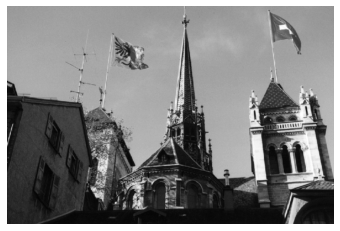

In [ ]:
# Load image as grayscale
image = cv2.imread('./Image18.jpg', cv2.IMREAD_GRAYSCALE)

# Show image
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()

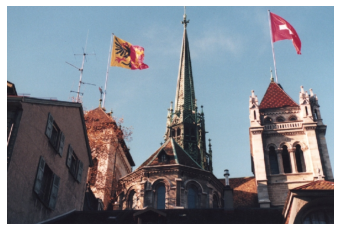

In [ ]:
# Load image in color
image_bgr = cv2.imread('./Image18.jpg', cv2.IMREAD_COLOR)

# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

In [ ]:
# Print images' shapes
(image.shape, image_rgb.shape)

((504, 756), (504, 756, 3))

#### Image Cropping

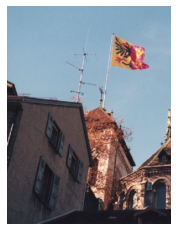

In [ ]:
# Select first half of the columns and all rows
image_cropped = image_rgb[:, :image_rgb.shape[1]//2, ::]

# Show image
plt.imshow(image_cropped), plt.axis("off")
plt.show()

#### Image Resizing and Rotating

(756, 1134, 3)


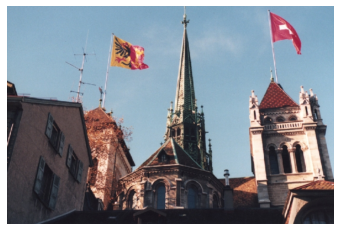

In [ ]:
# Upscale an image to 1.5X its size
scale_percent = 1.5
width = int(image_rgb.shape[1] * scale_percent)
height = int(image_rgb.shape[0] * scale_percent)
dim = (width, height)
  
# Resize the image
image_resized = cv2.resize(image_rgb, dim, interpolation = cv2.INTER_AREA)

# Print images' shape
print(image_resized.shape)

# Show image
plt.imshow(image_resized), plt.axis("off")
plt.show()

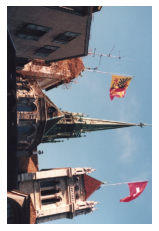

In [ ]:
# Rotate ang image 90 degree clockwise
image_rotate_90_clockwise = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

# Show image
plt.imshow(image_rotate_90_clockwise), plt.axis("off")
plt.show()

### Principal Component Analysis (PCA)

This section was adapted from [Sebastian Raschka's Blog](https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html). Visit this wonderful blog for more machine learning tutorials.

#### Load Iris Dataset

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True)

df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Split data table into data X and class labels y
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
y= df['class']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

#### PCA (Original Algorithm)

##### 1. Compute Covariance Matrix

In [ ]:
'''For the optimal performance of many machine learning algorithms, we may 
transform the data onto unit scale (mean=0 and variance=1)'''
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
# Compute covariance matrix manually
mean_vec = np.mean(X, axis=0)
cov_matrix_ = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0] - 1)
cov_matrix_

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
# Compute covariance matrix using numpy
cov_matrix = np.cov(X.T)
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
# Test for the two computed covariance matrices are equivalent
np.testing.assert_allclose(cov_matrix_, cov_matrix)
print("Nice. The two matrices are equal!")

Nice. The two matrices are equal!


In [ ]:
# Due to slight numerical errors and miscalculations we use allclose instead of equal
np.testing.assert_equal(cov_matrix_, cov_matrix)
print("Nice. The two matrices are equal!")

AssertionError: ignored

##### 2. Get Eigenvalues and Eigenvectors of Covariance Matrix

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
(eig_vals,eig_vecs)

(array([2.93035378, 0.92740362, 0.14834223, 0.02074601]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [ ]:
'''Note that many PCA implementations perform a Singular Value Decomposition 
(SVD) to improve the computational efficiency'''
u, s, v = np.linalg.svd(X.T)
eig_vals, eig_vecs = s, u
(eig_vals,eig_vecs)

(array([20.89551896, 11.75513248,  4.7013819 ,  1.75816839]),
 array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
        [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
        [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
        [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]]))

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low using eigenvalues
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Print the eigenvalues in descending order
print([eig[0] for eig in eig_pairs])

[2.930353775589317, 0.9274036215173419, 0.14834222648163944, 0.02074601399559593]


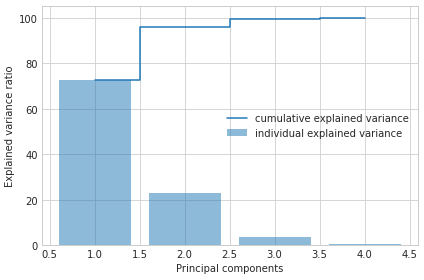

In [ ]:
# See explained variance to decide how many principal components we will keep
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(1,5), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(1,5), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

##### 3. Projection Onto the New Feature Space

In [ ]:
# Reducing the 4-D feature space to a 2-D feature subspace
proj_matrix = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

In [ ]:
# Project Iris data onto the new feature space
Y = X.dot(proj_matrix)
np.cov(Y.T)

array([[2.93035378e+00, 6.81582033e-16],
       [6.81582033e-16, 9.27403622e-01]])

In [ ]:
proj_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

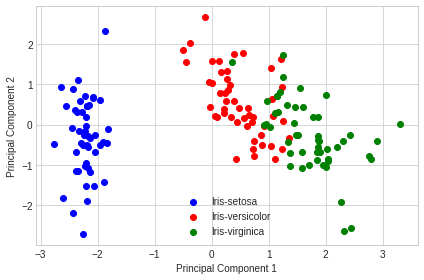

In [ ]:
# Visual the new data after projecting into 2-D feature space
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

#### PCA in scikit-learn

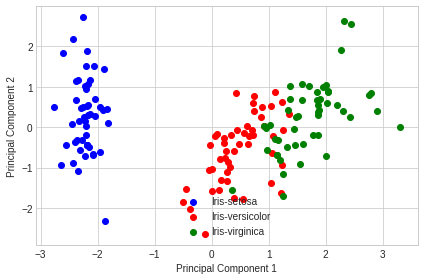

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

#### Image Compression using PCA

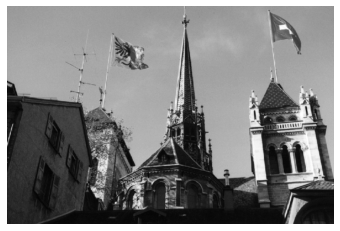

Image size: (504, 756)


In [ ]:
import cv2

# Load image as grayscale
image = cv2.imread('./Image18.jpg', cv2.IMREAD_GRAYSCALE)

# Show image
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()

print("Image size:", image.shape)

(504, 95)


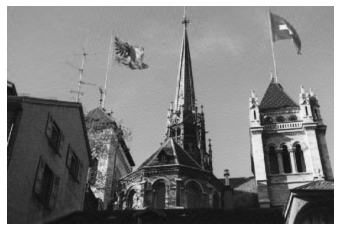

In [ ]:
from sklearn.decomposition import PCA

# Keep 95% of expalined variance
sklearn_pca = PCA(0.99)
temp = sklearn_pca.fit_transform(image)

# See how many princple components have been preserved
print(temp.shape)

# To visualize how PCA has performed this compression, inverse transform the PCA output
temp = sklearn_pca.inverse_transform(temp)
image_reconstructed = np.reshape(temp, (504, 756))

plt.imshow(image_reconstructed, cmap='gray'), plt.axis("off")
plt.show()

### Code Challenge

Given a image, flip it vertically without using any OpenCV or any other image processing libraries built-in functions. 

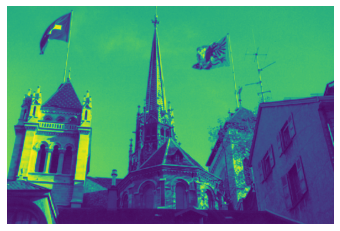

In [ ]:
"""Write your code below"""
image_cropped = image_rgb[:, ::-1,1]
plt.imshow(image_cropped), plt.axis("off")
plt.show()